In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
path = "watermelon_4.0.txt"
data_str = []
with open(path) as fr:
    lines = fr.readlines()
    for line in lines:
       data_str.append(line.split())
data = np.array(data_str).astype(np.float64)

In [3]:
def plot_res(C_set, k):
    # print(len(C_set))
    color_dict = ['red', 'blue', 'yellow', 'green']
    for i in range(k):
        plt.scatter(
            np.array(C_set[i])[:, 0], 
            np.array(C_set[i])[:, 1], 
            color=color_dict[i])
    plt.scatter(
        np.array(C_set[-1])[:, 0],
        np.array(C_set[-1])[:, -1],
        color='black',
        marker='x')

In [15]:
def run(data_set, k):
    m = data_set.shape[0]
    mean_vector = data_set[np.random.choice(m, k, replace=False)]
    Flag = True
    while Flag:
        C = []
        for i in range(k + 1):
            C.append([])
        for j in range(m):
            dj = ((data_set[j] - mean_vector) ** 2).sum(axis=1).argmin()
            C[dj].append(data_set[j].tolist())
        mean_prev = mean_vector.copy()
        for i in range(k):
            mean_vector[i] = np.array(C[i]).mean(axis=0).tolist()
        mean_delta = np.min(np.abs(mean_prev - mean_vector))
        if mean_delta == 0.0:
            Flag = False
    C[k] = mean_vector[:].tolist()
    plot_res(C, k)

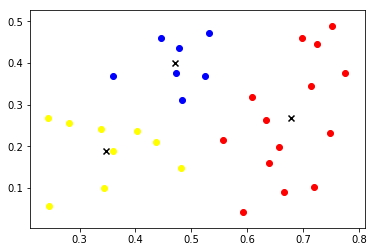

In [16]:
run(data, 3)